Click on the link below to access the dataset used in this project:
https://www.kaggle.com/datasets/arnabchaki/lung-cancer-detection-using-cnn

# Lung Cancer Detection using CNN

In [ ]:
# Data Set is from Kaggle: https://www.kaggle.com/datasets/arnabchaki/lung-cancer-detection-using-cnn
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000328_08_03_180.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000223_09_02_146.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000229_03_04_202.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000103_01_01_104.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000103_12_01_075.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000143_04_02_153.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/002276_05_03_078.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000020_03_01_166.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000054_03_01_025.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000230_04_01_242.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000058_07_01_170.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000058_07_01_195.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000230_03_02_166.png
/kaggle/inpu

#### Required Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import seaborn as sns
import cv2
import random
import os
import imageio
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from collections import Counter

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


##### Inputing the data files

In [3]:
directory = '../input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset'
cases = ['Bengin cases', 'Malignant cases', 'Normal cases']

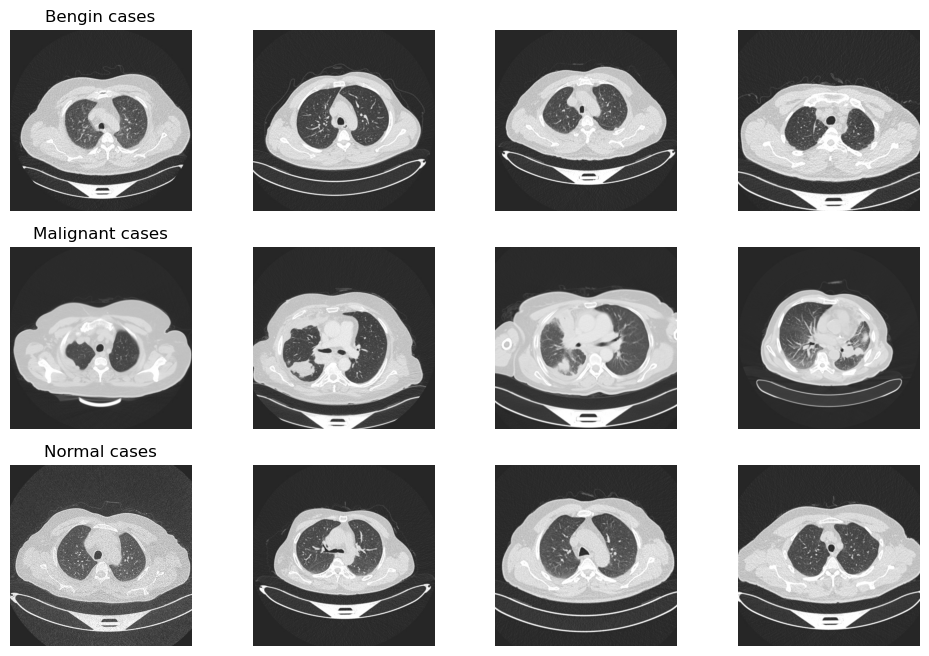

In [4]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))

for index, case in enumerate(cases):
    img_list = os.listdir(os.path.join(directory, case))
    for i in range(4):
        img = cv2.imread(os.path.join(directory, case, img_list[i]))
        ax[index, i].imshow(img)
        ax[index, i].axis('off')
        if i == 0:
            ax[index, i].set_title(case)

plt.show()

##### Modeling and Evaluation

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv2D

In [6]:
img_width, img_height = 224, 224
batch_size = 50

In [7]:
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)

In [8]:
training_data = datagen.flow_from_directory(directory, target_size=(img_width, img_height), batch_size=batch_size, class_mode='categorical', subset='training', shuffle=True, classes=['Bengin cases', 'Malignant cases', 'Normal cases'])
testing_data = datagen.flow_from_directory(directory, target_size=(img_width, img_height), batch_size=batch_size, class_mode='categorical', subset='validation', shuffle=True, classes=['Bengin cases', 'Malignant cases', 'Normal cases'])

Found 878 images belonging to 3 classes.
Found 219 images belonging to 3 classes.


In [ ]:
model = Sequential()

#Relu Activation Function for first layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3))) 
model.add(MaxPooling2D((2, 2)))

# Relu Activation Function for second layer
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

# Relu Activation Function for third layer
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

# Relu Activation Function for dense layer
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax')) # Softmax Activation Function for output layer

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.fit(training_data, epochs=5, validation_data=testing_data)

Epoch 1/5
18/18 [==============================] - 71s 4s/step - loss: 1.5530 - accuracy: 0.4943 - val_loss: 1.0057 - val_accuracy: 0.5114
Epoch 2/5
18/18 [==============================] - 66s 4s/step - loss: 0.9229 - accuracy: 0.5569 - val_loss: 0.9580 - val_accuracy: 0.5753
Epoch 3/5
18/18 [==============================] - 66s 4s/step - loss: 0.8582 - accuracy: 0.6150 - val_loss: 0.9980 - val_accuracy: 0.4977
Epoch 4/5
18/18 [==============================] - 66s 4s/step - loss: 0.7922 - accuracy: 0.6355 - val_loss: 0.9449 - val_accuracy: 0.5890
Epoch 5/5
18/18 [==============================] - 66s 4s/step - loss: 0.7770 - accuracy: 0.6708 - val_loss: 0.9498 - val_accuracy: 0.5297


##### Predicting on new data

1/1 [==============================] - 0s 410ms/step
Normal
1/1 [==============================] - 0s 41ms/step
Normal
1/1 [==============================] - 0s 44ms/step
Malignant


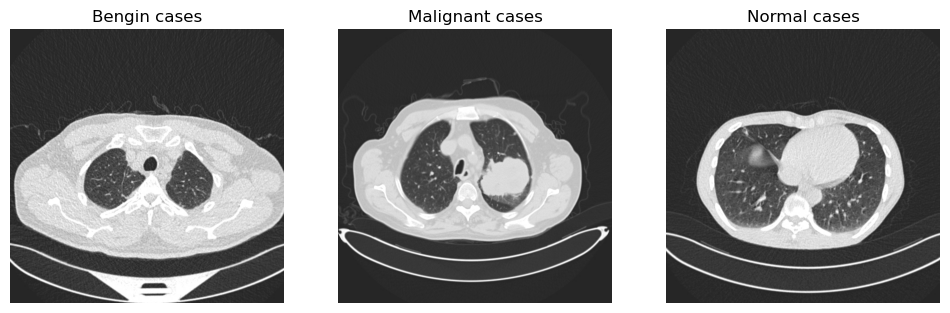

In [13]:
from tensorflow.keras.preprocessing import image

prediction_img = ['/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (117).jpg',
                   '/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (387).jpg', 
                  '/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (327).jpg']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))

for i in range(3):
    img = cv2.imread(prediction_img[i])
    ax[i].imshow(img)
    ax[i].axis('off')
    ax[i].set_title(cases[i])
            

for i in prediction_img:
    img = image.load_img(i, target_size=(img_width, img_height))
    img_arr = image.img_to_array(img)
    img_arr= np.expand_dims(img_arr, axis=0)
    img_arr= img_arr/255
    predictions = model.predict(img_arr)
    predicted_class = np.argmax(predictions)
    if predicted_class == 0:
        print('Benign')
    elif predicted_class == 1:
        print('Malignant')
    else:
        print('Normal')